In [66]:
import pandas as pd

data_path = '../data/VL_csv/tn_travel_여행_E_COST.csv'

df = pd.read_csv(data_path)
print(df.shape)

df.head(3).T

(320, 14)


,0,1,2
TRAVEL_ID,e_e000008,e_e000019,e_e000027
TRAVEL_NM,E03,E03,E03
TRAVELER_ID,e000008,e000019,e000027
TRAVEL_PURPOSE,3;4,1;4,2;5;21
TRAVEL_START_YMD,2023-04-29,2023-04-30,2023-04-30
TRAVEL_END_YMD,2023-04-30,2023-05-01,2023-05-01
MVMN_NM,NaN,NaN,NaN
TRAVEL_PERSONA,서울 외 수도권 방문/수도권 거주/40세 이상/자녀동반/일반미션,서울 외 수도권 방문/수도권 거주/40세 이상/부부/일반미션,서울 외 수도권 방문/수도권 거주/40세 이상/부모 동반/일반미션
TRAVEL_MISSION,3;4,1;4,2;5;21
TRAVEL_MISSION_CHECK,3;9;11,3;13;22,5;21;2


In [67]:
df['MVMN_NM'].value_counts()

MVMN_NM
자가용       148
대중교통 등    127
Name: count, dtype: int64

In [68]:
df.fillna({'MVMN_NM': '기타'}, inplace=True)
df['MVMN_NM'] = df['MVMN_NM'].replace('대중교통 등', '대중교통')
df['MVMN_NM'].value_counts()

MVMN_NM
자가용     148
대중교통    127
기타       45
Name: count, dtype: int64

### 페르소나 전처리

In [69]:
where = []
country = []
age = []
whowith = []
mission = []


for i, row in df.iterrows():
    tmp = row['TRAVEL_PERSONA'].split('/')
    if tmp[-1] == '특별미션':
        where.append(tmp[0])
        country.append(tmp[1])
        age.append(tmp[2])
        whowith.append(tmp[-1])
        mission.append(tmp[-1])
    else:
        where.append(tmp[0])
        country.append(tmp[1])
        age.append(tmp[2])
        whowith.append(tmp[3])
        mission.append(tmp[-1])

In [70]:
df['where'] = where
df['country'] = country
df['age'] = age
df['whowith'] = whowith
df['mission'] = mission

In [71]:
df['where'].value_counts()

where
서울 외 수도권 방문    163
서울 방문          101
경기 방문           47
인천 방문            9
Name: count, dtype: int64

In [72]:
df['country'].value_counts()

country
수도권 거주       199
거주지 구분 없음     80
수도권 외 거주      41
Name: count, dtype: int64

In [73]:
df['age'].value_counts()

age
39세 이하    229
40세 이상     91
Name: count, dtype: int64

In [74]:
df['whowith'].value_counts()

whowith
특별미션        80
커플          75
나홀로 여행      58
자녀동반        42
부부          27
3인 이상 친구    23
부모 동반       10
3대 동반 여행     5
Name: count, dtype: int64

In [75]:
df['mission'].value_counts()

mission
일반미션    240
특별미션     80
Name: count, dtype: int64

### Travel_mission_check 전처리

- 무조건 3개씩 고름

In [76]:
df['TRAVEL_MISSION_CHECK'].apply(lambda x: len(x.split(';'))).value_counts()

TRAVEL_MISSION_CHECK
3    320
Name: count, dtype: int64

In [77]:
df['TRAVEL_MISSION_CHECK'].apply(lambda x: x.split(';')).value_counts()

TRAVEL_MISSION_CHECK
[1, 22, 26]     7
[6, 22, 26]     4
[2, 6, 11]      4
[6, 22, 24]     3
[21, 22, 26]    3
               ..
[2, 5, 8]       1
[1, 2, 24]      1
[5, 8, 1]       1
[6, 24, 22]     1
[1, 4, 22]      1
Name: count, Length: 258, dtype: int64

In [78]:
df['TRAVEL_MISSION'] = df['TRAVEL_MISSION'].apply(lambda x: x.split(';')[0]) # Mission은 한개만

In [79]:
df['TRAVEL_MISSION_CHECK'] = df['TRAVEL_MISSION_CHECK'].apply(lambda x: x.split(';'))

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mission_matrix = mlb.fit_transform(df['TRAVEL_MISSION_CHECK'])

#### 페르소나 특징 확인
- 특별여행과 일반여행의 차이점 비교할 것

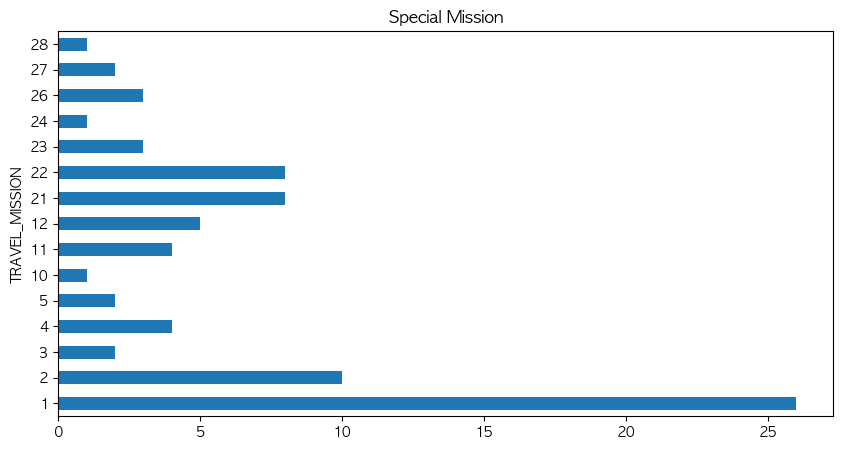

In [81]:
df.loc[df['mission'] == '특별미션', 'TRAVEL_MISSION'].astype(int).value_counts().sort_index(ascending=True).plot(kind='barh', figsize=(10, 5), title='Special Mission');

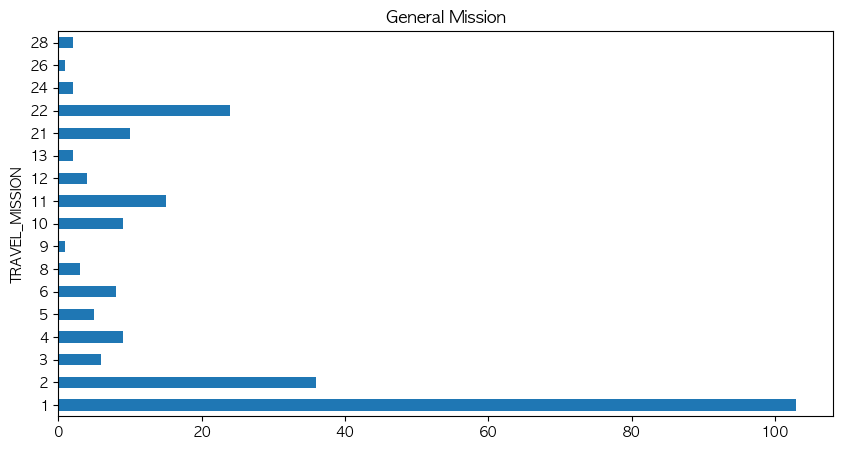

In [82]:
df.loc[df['mission'] == '일반미션', 'TRAVEL_MISSION'].astype(int).value_counts().sort_index(ascending=True).plot(kind='barh', figsize=(10, 5), title='General Mission');

In [83]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

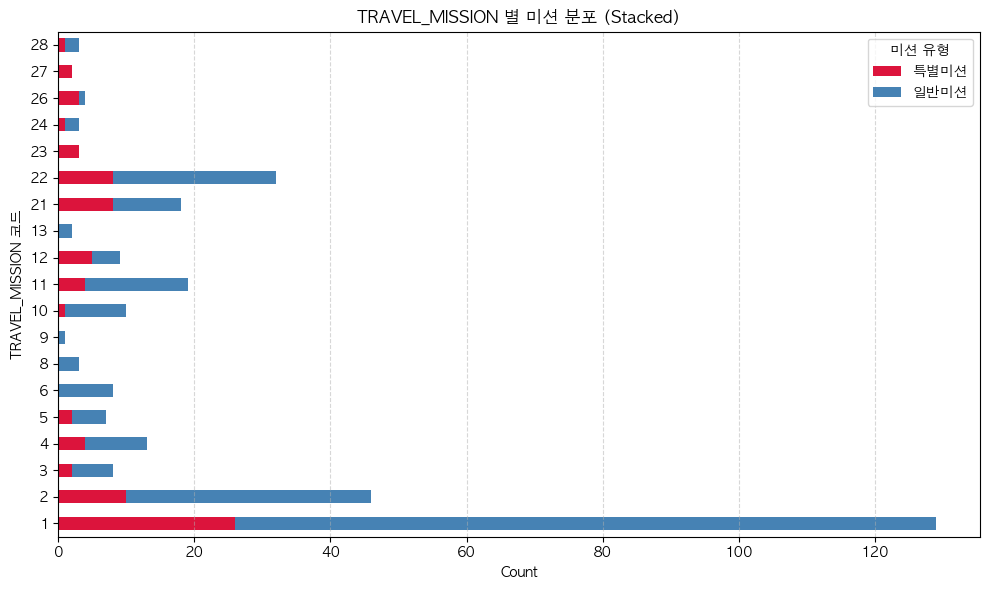

In [84]:
# 1. 미션별 카운트
special = df.loc[df['mission'] == '특별미션', 'TRAVEL_MISSION'].astype(int).value_counts()
general = df.loc[df['mission'] == '일반미션', 'TRAVEL_MISSION'].astype(int).value_counts()

# 2. 두 시리즈를 병합
mission_df = pd.DataFrame({
    '특별미션': special,
    '일반미션': general
}).fillna(0).astype(int).sort_index()

# 3. 막대 그래프
mission_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=['crimson', 'steelblue'])

plt.title("TRAVEL_MISSION 별 미션 분포 (Stacked)")
plt.xlabel("Count")
plt.ylabel("TRAVEL_MISSION 코드")
plt.legend(title="미션 유형")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

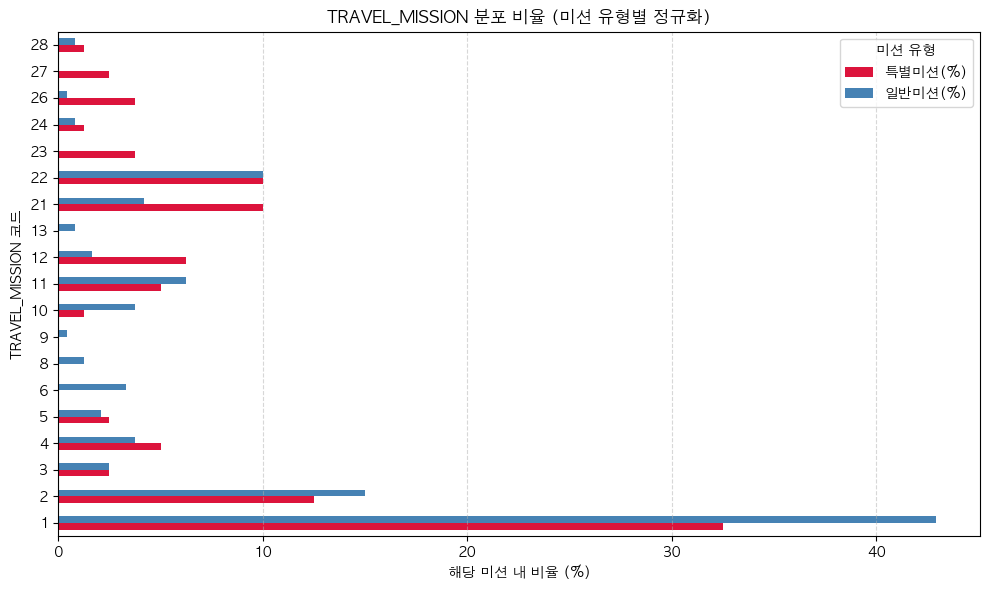

In [85]:
# 1. 개수 계산
special = df.loc[df['mission'] == '특별미션', 'TRAVEL_MISSION'].astype(int).value_counts(normalize=True) * 100
general = df.loc[df['mission'] == '일반미션', 'TRAVEL_MISSION'].astype(int).value_counts(normalize=True) * 100

mission_pct = pd.DataFrame({
    '특별미션(%)': special,
    '일반미션(%)': general
}).fillna(0).sort_index()

mission_pct.plot(kind='barh', figsize=(10, 6), color=['crimson', 'steelblue'])

plt.title("TRAVEL_MISSION 분포 비율 (미션 유형별 정규화)")
plt.xlabel("해당 미션 내 비율 (%)")
plt.ylabel("TRAVEL_MISSION 코드")
plt.legend(title="미션 유형")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##  TRAVEL_MISSION 유형별 주요 미션 분포

### 1. 일반 미션 (`mission == '일반미션'`)

| 미션 코드 | 미션 내용                | 특징               |
| ----- | -------------------- | ---------------- |
| `1번`  | 쇼핑                   | 가장 높은 비중         |
| `2번`  | 테마파크, 놀이시설, 동/식물원 방문 | 가족 단위, 대중적 성향 중심 |

> 일반 미션은 전체 참가자 수가 많고, **보편적인 여행 수요**가 반영된 결과로 보임

---

### 2. 특별 미션 (`mission == '특별미션'`)

| 미션 코드 | 미션 내용        | 특징                   |
| ----- | ------------ | -------------------- |
| `21번` | Well-ness 여행 | 트렌디한 헬스케어 및 힐링 중심    |
| `22번` | SNS 인생샷 여행   | 사진 촬영 중심, MZ세대 취향 반영 |

> 특별 미션은 상대적으로 참가자 수는 적지만, **명확한 컨셉**과 **차별화된 테마**가 강조됨

---

### 📊 시사점

* `일반미션`은 **일상적/대중적 목적**이 강하며, 쇼핑 및 놀이시설 선호도가 높음
* `특별미션`은 **힐링, 자기 표현(SNS)** 중심의 컨셉이 주를 이룸
* **추천 시스템 설계 시**, 미션 유형에 따라 **전혀 다른 사용자 니즈**를 반영해야 함

---


In [86]:
df['TRAVEL_PURPOSE'] = df['TRAVEL_PURPOSE'].apply(lambda x: x.split(';'))

In [87]:
df.drop(columns=['TRAVEL_PERSONA', 'TRAVEL_MISSION_CHECK'], inplace=True)

In [89]:
df.head(3).T

,0,1,2
TRAVEL_ID,e_e000008,e_e000019,e_e000027
TRAVEL_NM,E03,E03,E03
TRAVELER_ID,e000008,e000019,e000027
TRAVEL_PURPOSE,"[3, 4]","[1, 4]","[2, 5, 21]"
TRAVEL_START_YMD,2023-04-29,2023-04-30,2023-04-30
TRAVEL_END_YMD,2023-04-30,2023-05-01,2023-05-01
MVMN_NM,기타,기타,기타
TRAVEL_MISSION,3,1,2
PRE_COST,0,0,0
LODGOUT_COST,0,0,0


In [90]:
df.to_csv('../data/VL_csv/tn_travel_여행_E_COST_cleaned.csv', index=False, encoding='utf-8-sig')